<a href="https://colab.research.google.com/github/DanielZul24/Inteligencia-Artificial-ZUL/blob/main/P3_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El algoritmo Adaline (Adaptive Linear Neuron) es muy similar al modelo perceptrón, pero con una diferencia clave en la forma en que se actualizan los pesos. Mientras que el modelo perceptrón utiliza una función de activación escalonada (es decir, una predicción binaria directa basada en si el valor neto de entrada es mayor o menor que 0), Adaline utiliza el error continuo antes de aplicar la función de activación.

Entrenamiento de Adaline:

Al igual que el perceptrón, se ajustan los pesos de Adaline utilizando las características X y las etiquetas y.
En lugar de contar errores de clasificación como en el perceptrón, Adaline minimiza el costo (error cuadrático).

Se grafica el costo durante cada iteración (época) para ver cómo el modelo Adaline va mejorando su ajuste.

Comparación:
Se tiene tanto el perceptrón como Adaline en el mismo código, para ver la evolución de los errores en el perceptrón y el costo en Adaline, lo que permite comparar el rendimiento de ambos algoritmos.

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')


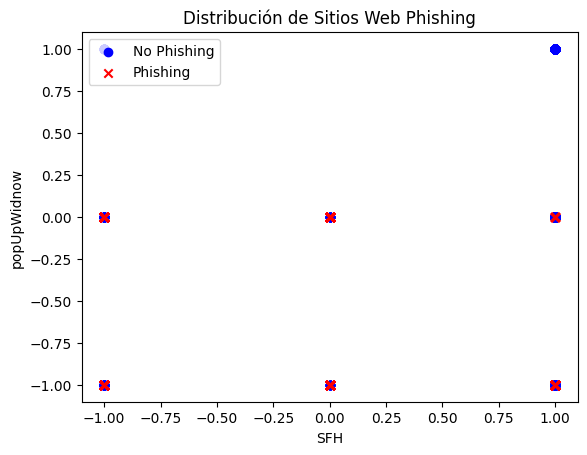

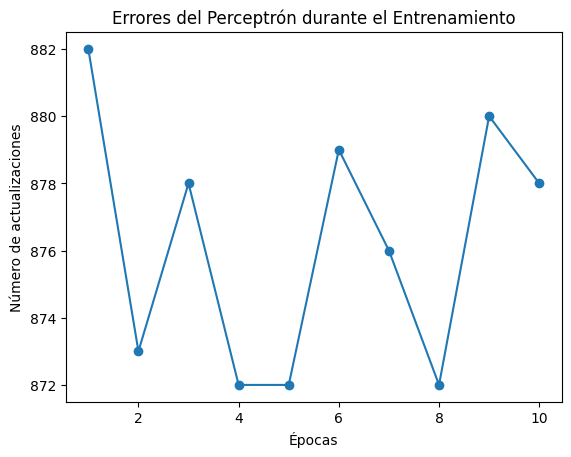

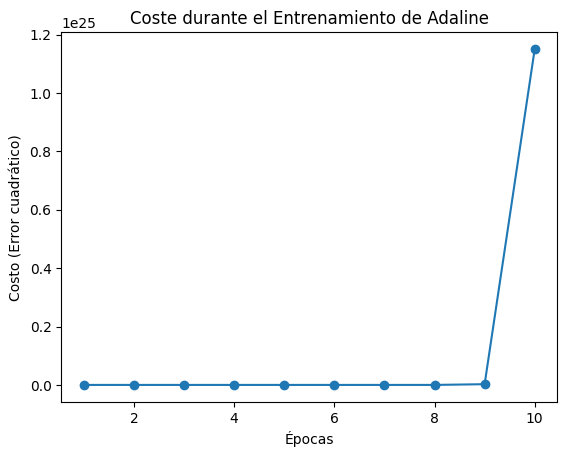

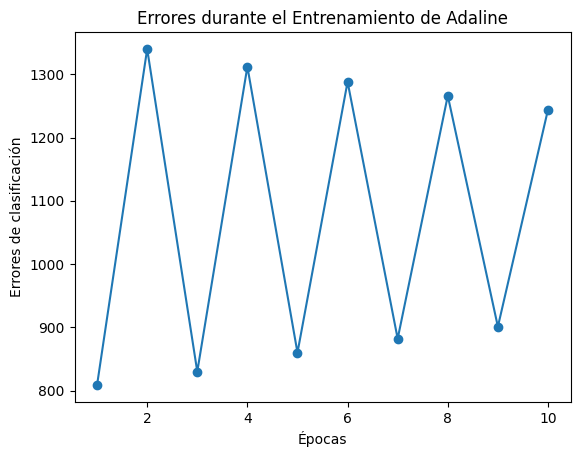

In [6]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

# Leer el archivo ARFF directamente
data = arff.loadarff('PhishingData.arff')
df = pd.DataFrame(data[0])  # Convertir a DataFrame

# Verificar las columnas del DataFrame
print(df.columns)  # Imprimir los nombres de las columnas

# Preprocesar los datos
y = df['Result'].astype(int).values

# Convertir -1 a 0 para que tengamos solo 0 y 1 como etiquetas
y = np.where(y == -1, 0, y)  # Esto convierte -1 a 0, y deja 1 como está

# Seleccionar características relevantes
X = df[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL',
         'URL_of_Anchor', 'web_traffic', 'URL_Length',
         'age_of_domain', 'having_IP_Address']].astype(int).values

# Graficar los datos
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='No Phishing')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Phishing')
plt.xlabel('SFH')
plt.ylabel('popUpWidnow')
plt.legend(loc='upper left')
plt.title('Distribución de Sitios Web Phishing')
plt.show()

# Entrenar el modelo de perceptrón
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # Iterar sobre el número de épocas
        for _ in range(self.n_iter):
            errors = 0  # Contador de errores para la época actual
            # Actualizar los pesos para cada muestra
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Cálculo de la actualización
                self.w_[1:] += update * xi  # Actualización de los pesos
                self.w_[0] += update  # Actualización del sesgo (bias)
                errors += int(update != 0.0)  # Incrementar el contador de errores si hay un cambio
            self.errors_.append(errors)  # Almacenar el número de errores de la época
        return self  # Retornar la instancia ajustada del perceptrón

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores durante cada época (iteración)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Errores del Perceptrón durante el Entrenamiento')
plt.show()

# Implementar el modelo Adaline
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        self.errors_ = []  # Lista para almacenar los errores de clasificación

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

            # Calcular los errores de clasificación
            predictions = self.predict(X)
            misclassifications = sum(predictions != y)
            self.errors_.append(misclassifications)  # Almacenar los errores de clasificación

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X  # En Adaline, la función de activación es la identidad (salida continua)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Entrenar el modelo Adaline
ada = AdalineGD(eta=0.01, n_iter=10)
ada.fit(X, y)

# Graficar el costo (error cuadrático) durante el entrenamiento
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Costo (Error cuadrático)')
plt.title('Coste durante el Entrenamiento de Adaline')
plt.show()

# Graficar los errores de clasificación durante el entrenamiento
plt.plot(range(1, len(ada.errors_) + 1), ada.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Errores de clasificación')
plt.title('Errores durante el Entrenamiento de Adaline')
plt.show()

